# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A/STAT121A Introduction to Data Science 


## Pre - Lab 3: `numpy`, plotting
## <font color='red'> PRE-LAB : DO THIS PART BEFORE COMING TO LAB</font>

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>

**Material prepared by**: David Sondak, Will Claybaugh, Pavlos Protopapas, and Eleni Kaxiras

---

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Numerical Python:  `numpy`
Review the concepts on numpy: Scientific `Python` code uses a fast array structure, called the `numpy` array. Those who have worked in `Matlab` will find this very natural.   For reference, the `numpy` documention can be found here: [`numpy`](http://www.numpy.org/).  


Let's make a numpy array.

In [2]:
import numpy as np

In [3]:
my_array = np.array([1,4,9,16])
my_array

array([ 1,  4,  9, 16])

Numpy arrays support the same operations as lists! Below we compute length, slice, and iterate. 

In [4]:
print("len(array):", len(my_array)) # Length of array

print("array[2:4]:", my_array[2:4]) # A slice of the array

# Iterate over the array
for ele in my_array:
    print("element:", ele)

len(array): 4
array[2:4]: [ 9 16]
element: 1
element: 4
element: 9
element: 16


**In general you should manipulate numpy arrays by using numpy module functions** (e.g. `np.mean`). This is for efficiency purposes, and a discussion follows below this section.

You can calculate the mean of the array elements either by calling the method `.mean` on a numpy array or by applying the function `np.mean` with the `numpy` array as an argument.

In [5]:
# Two ways of calculating the mean

print(my_array.mean())

print(np.mean(my_array))

7.5
7.5


The way we constructed the `numpy` array above seems redundant. After all we already had a regular `python` list. Indeed, it is the other ways we have to construct `numpy` arrays that make them super useful. 

There are many such `numpy` array *constructors*. Here are some commonly used constructors. Look them up in the documentation.

In [6]:
zeros = np.zeros(10) # generates 10 floating point zeros
zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

`Numpy` gains a lot of its efficiency from being strongly typed. That is, all elements in the array have the same type, such as integer or floating point. The default type, as can be seen above, is a float of size appropriate for the machine (64 bit on a 64 bit machine).

In [7]:
zeros.dtype

dtype('float64')

In [8]:
np.ones(10, dtype='int') # generates 10 integer ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

If the elements of an array are of a different type, `numpy` will force them into the same type (the longest in terms of bytes)

In [9]:
mixed = np.array([1, 2.3, 'eleni', True])

#elements are of different type
print(type(1), type(2.3), type('eleni'), type(True))

# all elements will become strings
mixed

<class 'int'> <class 'float'> <class 'str'> <class 'bool'>


array(['1', '2.3', 'eleni', 'True'], dtype='<U32')

Often you will want random numbers. Use the `random` constructor!

In [10]:
np.random.rand(10) # uniform on [0,1]

array([0.57273808, 0.37863788, 0.85189225, 0.23741135, 0.1584848 ,
       0.97217711, 0.17139812, 0.40158564, 0.61657583, 0.08064208])

You can generate random numbers from a normal distribution with mean $0$ and variance $1$ using `np.random.randn`:

In [11]:
normal_array = np.random.randn(10000)
print("The sample mean and standard devation are {0:17.16f} and {1:17.16f}, respectively.".format(np.mean(normal_array), np.std(normal_array)))

The sample mean and standard devation are 0.0126760983254676 and 0.9959853021278614, respectively.


#### `numpy` supports vector operations

What does this mean? It means that to add two arrays instead of looping ovr each element (e.g. via a list comprehension as in base Python) you get to simply put a plus sign between the two arrays.

In [12]:
ones_array = np.ones(5)
twos_array = 2*np.ones(5)
ones_array + twos_array

array([3., 3., 3., 3., 3.])

Note that this behavior is very different from `python` lists, which just get longer when you try to + them.

In [13]:
first_list = [1., 1., 1., 1., 1.]
second_list = [2., 2., 2., 2., 2.]
first_list + second_list # not what you want

[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0]

On some computer chips nunpy's addition actually happens in parallel, so speedups can be high. But even on regular chips, the advantage of greater readability is important.

`Numpy` supports a concept known as *broadcasting*, which dictates how arrays of different sizes are combined together. There are too many rules to list all of them here.  Here are two important rules:

1. Multiplying an array by a number multiplies each element by the number
2. Adding a number adds the number to each element.

In [14]:
ones_array + 1

array([2., 2., 2., 2., 2.])

In [15]:
5 * ones_array

array([5., 5., 5., 5., 5.])

This means that if you wanted the distribution $N(5, 7)$ you could do:

In [16]:
normal_5_7 = 5.0 + 7.0 * normal_array

np.mean(normal_5_7), np.std(normal_5_7)

(5.088732688278273, 6.971897114895029)

Now you have seen how to create and work with simple one dimensional arrays in `numpy`.  You have also been introduced to some important `numpy` functionality (e.g. `mean` and `std`).

Next, we push ahead to two-dimensional arrays and begin to dive into some of the deeper aspects of `numpy`.

### 2D arrays
We can create two-dimensional arrays without too much fuss.

In [17]:
# create a 2d-array by handing a list of lists
my_array2d = np.array([ 
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12] 
])

# you can do the same without the pretty formatting (decide which style you like better)
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])


# 3 x 4 array of ones
ones_2d = np.ones([3, 4])
print(ones_2d, "\n")

# 3 x 4 array of ones with random noise
ones_noise = ones_2d + 0.01*np.random.randn(3, 4)
print(ones_noise, "\n")

# 3 x 3 identity matrix
my_identity = np.eye(3)
print(my_identity, "\n")

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

[[1.02147699 1.00884339 1.01145817 1.00528186]
 [0.98676778 1.00488783 0.99346165 1.00345233]
 [1.00556531 1.00569217 1.00156923 0.98652223]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



Like lists, `numpy` arrays are $0$-indexed.  Thus we can access the $n$th row and the $m$th column of a two-dimensional array with the indices $[n - 1, m - 1]$.

In [18]:
print(my_array2d)
print("element [2,3] is:", my_array2d[2, 3])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
element [2,3] is: 12


Numpy arrays can be sliced, and can be iterated over with loops.  Below is a schematic illustrating slicing two-dimensional arrays.  

 <img src="../images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>
 
Notice that the list slicing syntax still works!  
`array[2:,3]` says "in the array, get rows 2 through the end, column 3]"  
`array[3,:]` says "in the array, get row 3, all columns".

Numpy functions will by default work on the entire array:

In [19]:
np.sum(ones_2d)

12.0

The axis `0` is the one going downwards (i.e. the rows), whereas axis `1` is the one going across (the columns). You will often use functions such as `mean` or `sum` along a particular axis. If you `sum` along axis 0 you are summing across the rows and will end up with one value per column. As a rule, any axis you list in the axis argument will dissapear.

In [20]:
np.sum(ones_2d, axis=0)

array([3., 3., 3., 3.])

In [21]:
np.sum(ones_2d, axis=1)

array([4., 4., 4.])

<div class="exercise"><b>Exercise</b></div>

Create a two-dimensional array of size $3\times 5$ and do the following:
  * Print out the array
  * Print out the shape of the array
  * Create two slices of the array:
    1. The first slice should be the last row and the third through last column
    2. The second slice should be rows $1-3$ and columns $3-5$
  * Square each element in the array and print the result
  
(*solutions follow but try not to look at them!*)

In [ ]:
# your code here


In [ ]:
# Solution
A = np.array([ [5, 4, 3, 2, 1], [1, 2, 3, 4, 5], [1.1, 2.2, 3.3, 4.4, 5.5] ])
print(A, "\n")

# set length(shape)
dims = A.shape
print(dims, "\n")

# slicing
print(A[-1, 2:], "\n")
print(A[1:3, 3:5], "\n")

# squaring
A2 = A * A
print(A2)

#### `numpy` supports matrix operations
2d arrays are numpy's way of representing matrices. As such there are lots of built-in methods for manipulating them

Earlier when we generated the one-dimensional arrays of ones and random numbers, we gave `ones` and `random`  the number of elements we wanted in the arrays. In two dimensions, we need to provide the shape of the array, i.e., the number of rows and columns of the array.

In [ ]:
three_by_four = np.ones([3,4])
three_by_four

You can transpose the array:

In [ ]:
three_by_four.shape

In [ ]:
four_by_three = three_by_four.T

In [ ]:
four_by_three.shape

Matrix multiplication is accomplished by `np.dot`. The `*` operator will do element-wise multiplication.

In [ ]:
print(np.dot(three_by_four, four_by_three)) # 3 x 3 matrix
np.dot(four_by_three, three_by_four) # 4 x 4 matrix

### `Numpy `Arrays vs. `Python` Lists?

1. Why the need for `numpy` arrays?  Can't we just use `Python` lists?
2. Iterating over `numpy` arrays is slow. Slicing is faster.

`Python` lists may contain items of different types. This flexibility comes at a price: `Python` lists store *pointers* to memory locations.  On the other hand, `numpy` arrays are typed, where the default type is floating point.  Because of this, the system knows how much memory to allocate, and if you ask for an array of size $100$, it will allocate one hundred contiguous spots in memory, where the size of each spot is based on the type.  This makes access extremely fast.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" alt="Drawing" style="width: 500px;"/>

(image from Jake Vanderplas's Data Science Handbook)

Unfortunately, looping over an array slows things down. In general you should not access `numpy` array elements by iteration.  This is because of type conversion.  `Numpy` stores integers and floating points in `C`-language format.  When you operate on array elements through iteration, `Python` needs to convert that element to a `Python` `int` or `float`, which is a more complex beast (a `struct` in `C` jargon).  This has a cost.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png" alt="Drawing" style="width: 500px;"/>

(image from Jake Vanderplas's Data Science Handbook)

If you want to know more, we will suggest that you read 
- [Jake Vanderplas's Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). 
- [Wes McKinney's Python for Data Analysis](https://hollis.harvard.edu/primo-explore/fulldisplay?docid=01HVD_ALMA512247401160003941&context=L&vid=HVD2&lang=en_US&search_scope=everything&adaptor=Local%20Search%20Engine&tab=everything&query=any,contains,Wes%20McKinney%27s%20Python%20for%20Data%20Analysis&sortby=rank&offset=0) (HOLLIS)<br>
You will find them both incredible resources for this class.

Why is slicing faster? The reason is technical: slicing provides a *view* onto the memory occupied by a `numpy` array, instead of creating a new array. That is the reason the code above this cell works nicely as well. However, if you iterate over a slice, then you have gone back to the slow access.

By contrast, functions such as `np.dot` are implemented at `C`-level, do not do this type conversion, and access contiguous memory. If you want this kind of access in `Python`, use the `struct` module or `Cython`. Indeed many fast algorithms in `numpy`, `pandas`, and `C` are either implemented at the `C`-level, or employ `Cython`.

## 2 - Plotting with matplot lib (and beyond)
<img style="float: center" src="https://imgs.xkcd.com/comics/convincing.png"> 

Conveying your findings convincingly is an absolutely crucial part of any analysis. Therefore, you must be able to write well and make compelling visuals.  Creating informative visuals is an involved process and we won't cover that in this lab.  However, part of creating informative data visualizations means generating *readable* figures.  If people can't read your figures or have a difficult time interpreting them, they won't understand the results of your work.  Here are some non-negotiable commandments for any plot:
* Label $x$ and $y$ axes
* Axes labels should be informative
* Axes labels should be large enough to read
* Make tick labels large enough
* Include a legend if necessary
* Include a title if necessary
* Use appropriate line widths
* Use different line styles for different lines on the plot
* Use different markers for different lines

There are other important elements, but that list should get you started on your way.

Here is the anatomy of a figure:
 <img src="https://tacaswell.github.io/matplotlib/_images/anatomy.png" alt="Drawing" style="width: 500px;"/>
 
taken from [showcase example code: anatomy.py](https://tacaswell.github.io/matplotlib/examples/showcase/anatomy.html).

Before diving in, one more note should be made.  We will not focus on the internal aspects of `matplotlib`.  Today's lab will really only focus on the basics and developing good plotting practices.  There are many excellent tutorials out there for `matplotlib`.  For example,
* [`matplotlib` homepage](https://matplotlib.org/)
* [`matplotlib` tutorial](https://github.com/matplotlib/AnatomyOfMatplotlib)

### `matplotlib`

First, let's generate some data.

<div class="exercise"><b>Exercise</b></div>
Use the following three functions to make some plots:

* Logistic function:
  \begin{align*}
    f\left(z\right) = \dfrac{1}{1 + be^{-az}}
  \end{align*}
  where $a$ and $b$ are parameters.
* Hyperbolic tangent:
  \begin{align*}
    g\left(z\right) = b\tanh\left(az\right) + c
  \end{align*}
  where $a$, $b$, and $c$ are parameters.
* Rectified Linear Unit:
  \begin{align*}
    h\left(z\right) = 
    \left\{
      \begin{array}{lr}
        z, \quad z > 0 \\
        \epsilon z, \quad z\leq 0
      \end{array}
    \right.
  \end{align*}
  where $\epsilon < 0$ is a small, positive parameter.

You are given the code for the first two functions.  Notice that $z$ is passed in as a `numpy` array and that the functions are returned as `numpy` arrays.  Parameters are passed in as floats.

You should write a function to compute the rectified linear unit.  The input should be a `numpy` array for $z$ and a positive float for $\epsilon$.

In [ ]:
# Your code here

In [25]:
# solution
import numpy as np

def logistic(z: np.ndarray, a: float, b: float) -> np.ndarray:
    """ Compute logistic function
      Inputs:
         a: exponential parameter
         b: exponential prefactor
         z: numpy array; domain
      Outputs:
         f: numpy array of floats, logistic function
    """
    
    den = 1.0 + b * np.exp(-a * z)
    return 1.0 / den

def stretch_tanh(z: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """ Compute stretched hyperbolic tangent
      Inputs:
         a: horizontal stretch parameter (a>1 implies a horizontal squish)
         b: vertical stretch parameter
         c: vertical shift parameter
         z: numpy array; domain
      Outputs:
         g: numpy array of floats, stretched tanh
    """
    return b * np.tanh(a * z) + c

def relu(z: np.ndarray, eps: float = 0.01) -> np.ndarray:
    """ Compute rectificed linear unit
      Inputs:
         eps: small positive parameter
         z: numpy array; domain
      Outputs:
         h: numpy array; relu
    """
    return np.fmax(z, eps * z)

Now let's make some plots.  First, let's just warm up and plot the logistic function.

In [26]:
x = np.linspace(-5.0, 5.0, 100) # Equally spaced grid of 100 pts between -5 and 5

f = logistic(x, 1.0, 1.0) # Generate data

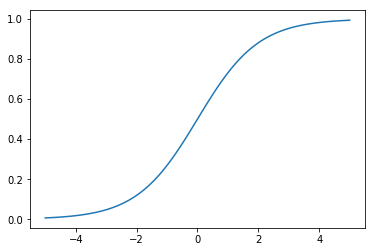

In [27]:
import matplotlib.pyplot as plt

# This is only needed in Jupyter notebooks!  Displays the plots for us.
%matplotlib inline 

plt.plot(x, f); # Use the semicolon to suppress some iPython output (not needed in real Python scripts)

Wonderful!  We have a plot.  Let's clean it up a bit by putting some labels on it.

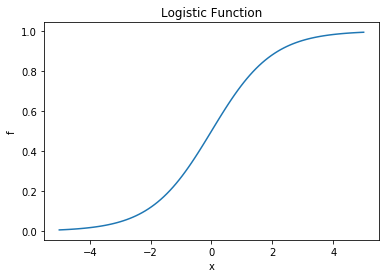

In [28]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function');

Okay, it's getting better.  Still super ugly.  I see these kinds of plots at conferences all the time.  Unreadable.  We can do better.  Much, much better.  First, let's throw on a grid.

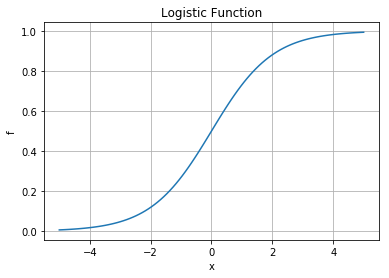

In [29]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function')
plt.grid(True)

At this point, our plot is starting to get a little better but also a little crowded.

#### A note on gridlines
Gridlines can be very helpful in many scientific disciplines.  They help the reader quickly pick out important points and limiting values.  On the other hand, they can really clutter the plot.  Some people recommend never using gridlines, while others insist on them being present.  The correct approach is probably somewhere in between.  Use gridlines when necessary, but dispense with them when they take away more than they provide.  Ask yourself if they help bring out some important conclusion from the plot.  If not, then best just keep them away.

Before proceeding any further, I'm going to change notation.  The plotting interface we've been working with so far is okay, but not as flexible as it can be.  In fact, I don't usually generate my plots with this interface.  I work with slightly lower-level methods, which I will introduce to you now.  The reason I need to make a big deal about this is because the lower-level methods have a slightly different API.  This will become apparent in my next example.

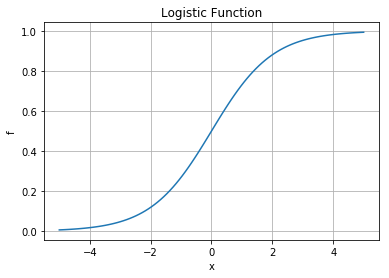

In [30]:
fig, ax = plt.subplots(1,1) # Get figure and axes objects

ax.plot(x, f) # Make a plot

# Create some labels
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.set_title('Logistic Function')

# Grid
ax.grid(True)

Wow, it's *exactly* the same plot!  Notice, however, the use of `ax.set_xlabel()` instead of `plt.xlabel()`.  The difference is tiny, but you should be aware of it.  I will use this plotting syntax from now on.

What else do we need to do to make this figure better?  Here are some options:
* Make labels bigger!
* Make line fatter
* Make tick mark labels bigger
* Make the grid less pronounced
* Make figure bigger

Let's get to it.

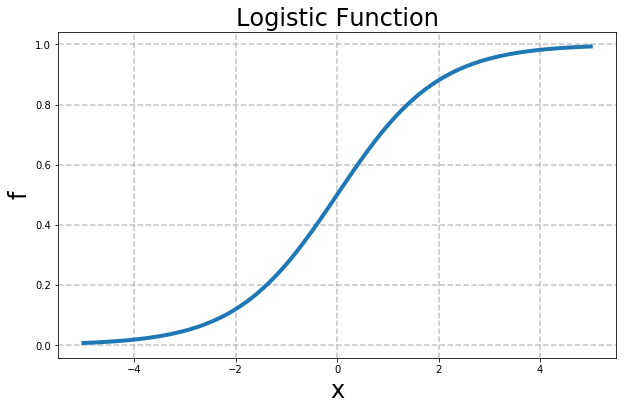

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

ax.plot(x, f, lw=4) # Linewidth bigger
ax.set_xlabel('x', fontsize=24) # Fontsize bigger
ax.set_ylabel('f', fontsize=24) # Fontsize bigger
ax.set_title('Logistic Function', fontsize=24) # Fontsize bigger
ax.grid(True, lw=1.5, ls='--', alpha=0.75) # Update grid

Notice:
* `lw` stands for `linewidth`.  We could also write `ax.plot(x, f, linewidth=4)`
* `ls` stands for `linestyle`.
* `alpha` stands for transparency.

Things are looking good now!  Unfortunately, people still can't read the tick mark labels.  Let's remedy that presently.

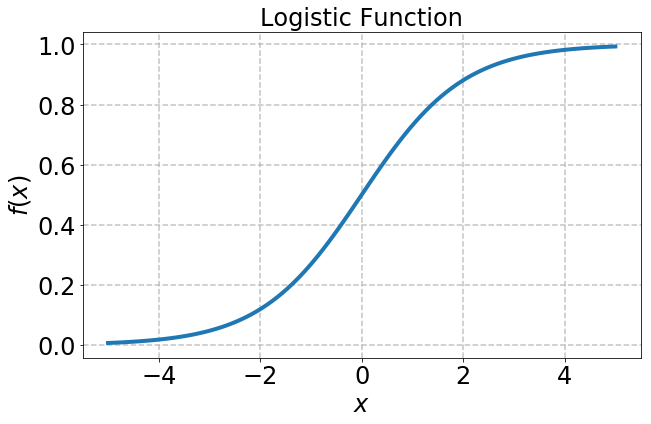

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

The only thing remaining to do is to change the $x$ limits.  Clearly these should go from $-5$ to $5$.

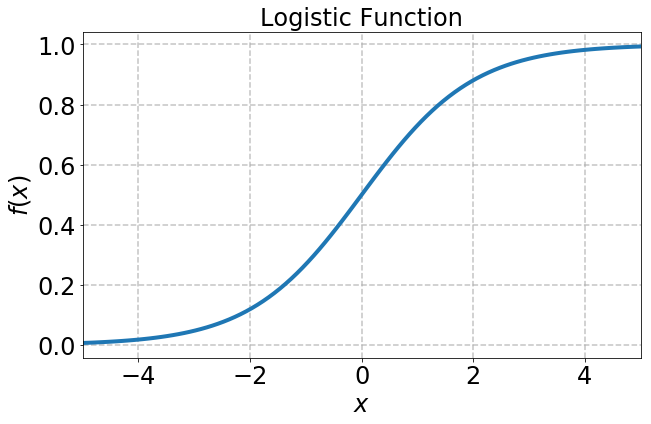

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Set axes limits
ax.set_xlim(x.min(), x.max())

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

You can play around with figures forever making them perfect.  At this point, everyone can read and interpret this figure just fine.  Don't spend your life making the perfect figure.  Make it good enough so that you can convey your point to your audience.  Then save if it for later.

In [34]:
fig.savefig('logistic.png')

Done!  Let's take a look.
![](../images/logistic.png)

#### Resources
If you want to see all the styles available, please take a look at the documentation.
* [Line styles](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle)
* [Marker styles](https://matplotlib.org/2.0.1/api/markers_api.html#module-matplotlib.markers)
* [Everything you could ever want](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_marker)

We haven't discussed it yet, but you can also put a legend on a figure.  You'll do that in the next exercise.  Here are some additional resources:
* [Legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)
* [Grid](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html)

<div class="exercise"><b>Exercise</b></div>

Do the following:
* Make a figure with the logistic function, hyperbolic tangent, and rectified linear unit.
* Use different line styles for each plot
* Put a legend on your figure

Here's an example of a figure:
![](../images/nice_plots.png)

You don't need to make the exact same figure, but it should be just as nice and readable.

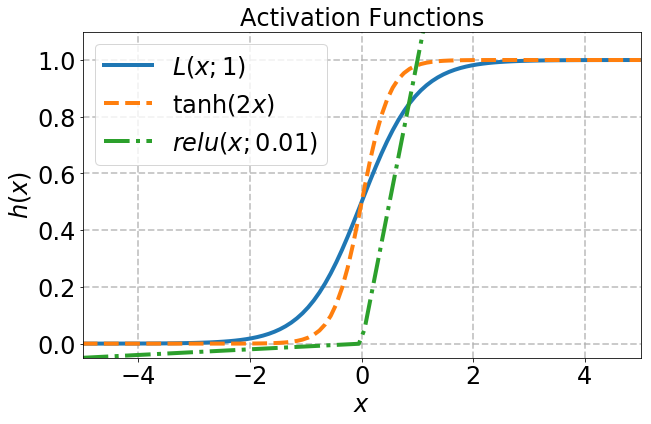

In [35]:
# your code here

# First get the data
f = logistic(x, 2.0, 1.0)
g = stretch_tanh(x, 2.0, 0.5, 0.5)
h = relu(x)

fig, ax = plt.subplots(1,1, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax.plot(x, f, lw=4, ls='-', label=r'$L(x;1)$')
ax.plot(x, g, lw=4, ls='--', label=r'$\tanh(2x)$')
ax.plot(x, h, lw=4, ls='-.', label=r'$relu(x; 0.01)$')

# Make the tick labels readable
ax.tick_params(labelsize=24)

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$h(x)$', fontsize=24)
ax.set_title('Activation Functions', fontsize=24)

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best', fontsize=24);

fig.savefig('nice_plots.png')

There a many more things you can do to the figure to spice it up.  Remember, there must be a tradeoff between making a figure look good and the time you put into it.  

**The guiding principle should be that your audience needs to easily read and understand your figure.**

There are of course other types of figures including, but not limited to, 
* Scatter plots (you will use these all the time)
* Bar charts
* Histograms
* Contour plots
* Surface plots
* Heatmaps

We will learn more about these different types of plotting in Lab5.

Before moving on, we will discuss another way to make your plots look good without all the hassle.  I'll make a beautiful plot without having to specify annoying arguments every single time.

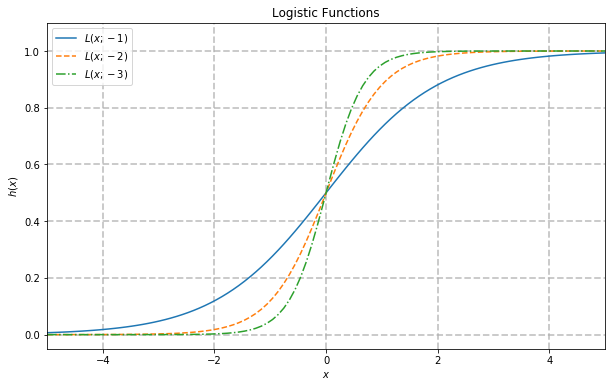

In [36]:
# First get the data
f1 = logistic(x, 1.0, 1.0)
f2 = logistic(x, 2.0, 1.0)
f3 = logistic(x, 3.0, 1.0)

fig, ax = plt.subplots(1,1, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax.plot(x, f1, ls='-', label=r'$L(x;-1)$')
ax.plot(x, f2, ls='--', label=r'$L(x;-2)$')
ax.plot(x, f3, ls='-.', label=r'$L(x;-3)$')

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x)$')
ax.set_title('Logistic Functions')

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best')

That's a good-looking plot!  Notice that we didn't need to have all those annoying `fontsize` specifications floating around.  If you want to reset the defaults, just use `plt.rcdefaults()`.

Now, how in the world did this work?  Obviously, there is something special about the `config` file.  I didn't give you a config file, but the next exercise requires you to create one.

### No Excuses
With all of these resourses, there is no reason to have a bad figure. 